<a href="https://colab.research.google.com/github/ousseeema/data-science/blob/main/Copie_de__to_number_solved_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imporation de pandas , numpy, matplotlib,seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the files
data = pd.read_excel("imap_export.xls")
#project the dataframe
data


,Data Export - Filters applied: (none) Data As Of Aug 2024,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Factory Name,Factory Type,Product Type Type,"Nike, Inc. Brand(s)",Events,Supplier Group,Address,City,State,Postal Code,Country / Region,Region,Total Workers,Line Workers,% Female Workers,% Migrant Workers
1,EVEREST TEXTILE CO LTD,MATERIALS,Apparel,Nike,NaN,EVEREST TEXTILE,No 256 Minghe Village,Tainan City,Tainan,743002,Taiwan,N ASIA,1439,811,51,57
2,Big Game Sports,FINISHED GOODS,Equipment,Nike,Collegiate,BIG GAME SPORTS,13835 Welch Rd,Dallas,Texas,75244,USA,AMERICAS,68,51,36,0
3,PT Semarang Garment,FINISHED GOODS,Apparel,Nike,NaN,KUKDONG,JL Soekarno Hatta Km 25,Semarang,Jawa Tengah,50552,Indonesia,S ASIA,3851,3462,94,0
4,Charmgo (Cambodia) Co. Ltd,FINISHED GOODS,Apparel,Nike,NaN,CHARMGO,Pham Bostanei Kuhn Kaheing Srok Samrongtong Ka...,Kampong Spey,Kampong Spueu,05207,Cambodia,SE ASIA,1557,1526,71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,PT Victory Chingluh Indonesia,FINISHED GOODS,Footwear,Nike,NaN,CHING LUH,JL Raya Pasarkemis Rajeg,Tangerang,Banten,15560,Indonesia,S ASIA,4014,3475,55,0
633,"Olive Apparel (Cambodia) Co., Ltd.",FINISHED GOODS,Apparel,Nike,NaN,RAMATEX,National Road No 3 Phum Prey Kambot,Phnom Penh,Phnom Penh,120910,Cambodia,SE ASIA,1274,1107,89,0
634,PT. Kanindo Makmur Jaya,FINISHED GOODS,Equipment,Nike,Collegiate,KANAAN,Jalan Raya Jepara Kudus,Jepara,Jawa Tengah,59462,Indonesia,S ASIA,6680,6582,62,0
635,South Island Garment Sdn Bhd,FINISHED GOODS,Apparel,Nike,Collegiate,SOUTH ISLAND,2468 Solok Perusahaan Dua,Perai,Pulau Pinang,13600,Malaysia,S ASIA,621,344,53,82


In [4]:
# We noticed that the column names are in the first row, so we reset the format by assigning the first row as column names.
# Then, we removed the first row (which contained the column names) from the data and reset the index.
data.columns=["Factory Name","Factory Type","Product Type","Brand","Events","Supplier Group","Address","City","State","Postal Code","Country","Region","Total Workers","Line Workers","% Female Workers","Migrant Workers"]
data = data.iloc[1:]
data= data.reset_index(drop=True)
data.head()

,Factory Name,Factory Type,Product Type,Brand,Events,Supplier Group,Address,City,State,Postal Code,Country,Region,Total Workers,Line Workers,% Female Workers,Migrant Workers
0,EVEREST TEXTILE CO LTD,MATERIALS,Apparel,Nike,NaN,EVEREST TEXTILE,No 256 Minghe Village,Tainan City,Tainan,743002,Taiwan,N ASIA,1439,811,51,57
1,Big Game Sports,FINISHED GOODS,Equipment,Nike,Collegiate,BIG GAME SPORTS,13835 Welch Rd,Dallas,Texas,75244,USA,AMERICAS,68,51,36,0
2,PT Semarang Garment,FINISHED GOODS,Apparel,Nike,NaN,KUKDONG,JL Soekarno Hatta Km 25,Semarang,Jawa Tengah,50552,Indonesia,S ASIA,3851,3462,94,0
3,Charmgo (Cambodia) Co. Ltd,FINISHED GOODS,Apparel,Nike,NaN,CHARMGO,Pham Bostanei Kuhn Kaheing Srok Samrongtong Ka...,Kampong Spey,Kampong Spueu,05207,Cambodia,SE ASIA,1557,1526,71,1
4,SAN FANG (TR1) (CHINA),MATERIALS,Footwear,Nike,NaN,SAN FANG,YUE YUEN INDUSTRIAL PARK,"DONGGUAN, GUANGDONG",Guangdong,511700,China,N ASIA,307,225,20,0


In [5]:
# Convert % Female Workers to actual number and replace the original % column
data['% Female Workers'] = ((data['Total Workers'] * data['% Female Workers']) / 100).astype(int)

# Rename the column to reflect that it now contains actual counts instead of percentages
data.rename(columns={'% Female Workers': 'Female Workers'}, inplace=True)

# Display the DataFrame to verify the changes
data.head()


,Factory Name,Factory Type,Product Type,Brand,Events,Supplier Group,Address,City,State,Postal Code,Country,Region,Total Workers,Line Workers,Female Workers,Migrant Workers
0,EVEREST TEXTILE CO LTD,MATERIALS,Apparel,Nike,NaN,EVEREST TEXTILE,No 256 Minghe Village,Tainan City,Tainan,743002,Taiwan,N ASIA,1439,811,733,57
1,Big Game Sports,FINISHED GOODS,Equipment,Nike,Collegiate,BIG GAME SPORTS,13835 Welch Rd,Dallas,Texas,75244,USA,AMERICAS,68,51,24,0
2,PT Semarang Garment,FINISHED GOODS,Apparel,Nike,NaN,KUKDONG,JL Soekarno Hatta Km 25,Semarang,Jawa Tengah,50552,Indonesia,S ASIA,3851,3462,3619,0
3,Charmgo (Cambodia) Co. Ltd,FINISHED GOODS,Apparel,Nike,NaN,CHARMGO,Pham Bostanei Kuhn Kaheing Srok Samrongtong Ka...,Kampong Spey,Kampong Spueu,05207,Cambodia,SE ASIA,1557,1526,1105,1
4,SAN FANG (TR1) (CHINA),MATERIALS,Footwear,Nike,NaN,SAN FANG,YUE YUEN INDUSTRIAL PARK,"DONGGUAN, GUANGDONG",Guangdong,511700,China,N ASIA,307,225,61,0


In [6]:
# Correcting the number of the migrant workers (the number was in %)
data['Migrant Workers'] = ((data['Total Workers'] * data['Migrant Workers']) / 100).astype(int)

# Display the DataFrame to verify the changes
data.head()


,Factory Name,Factory Type,Product Type,Brand,Events,Supplier Group,Address,City,State,Postal Code,Country,Region,Total Workers,Line Workers,Female Workers,Migrant Workers
0,EVEREST TEXTILE CO LTD,MATERIALS,Apparel,Nike,NaN,EVEREST TEXTILE,No 256 Minghe Village,Tainan City,Tainan,743002,Taiwan,N ASIA,1439,811,733,820
1,Big Game Sports,FINISHED GOODS,Equipment,Nike,Collegiate,BIG GAME SPORTS,13835 Welch Rd,Dallas,Texas,75244,USA,AMERICAS,68,51,24,0
2,PT Semarang Garment,FINISHED GOODS,Apparel,Nike,NaN,KUKDONG,JL Soekarno Hatta Km 25,Semarang,Jawa Tengah,50552,Indonesia,S ASIA,3851,3462,3619,0
3,Charmgo (Cambodia) Co. Ltd,FINISHED GOODS,Apparel,Nike,NaN,CHARMGO,Pham Bostanei Kuhn Kaheing Srok Samrongtong Ka...,Kampong Spey,Kampong Spueu,05207,Cambodia,SE ASIA,1557,1526,1105,15
4,SAN FANG (TR1) (CHINA),MATERIALS,Footwear,Nike,NaN,SAN FANG,YUE YUEN INDUSTRIAL PARK,"DONGGUAN, GUANGDONG",Guangdong,511700,China,N ASIA,307,225,61,0


In [7]:
#info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Factory Name     636 non-null    object
 1   Factory Type     636 non-null    object
 2   Product Type     636 non-null    object
 3   Brand            636 non-null    object
 4   Events           148 non-null    object
 5   Supplier Group   636 non-null    object
 6   Address          636 non-null    object
 7   City             635 non-null    object
 8   State            636 non-null    object
 9   Postal Code      636 non-null    object
 10  Country          636 non-null    object
 11  Region           636 non-null    object
 12  Total Workers    636 non-null    object
 13  Line Workers     636 non-null    object
 14  Female Workers   636 non-null    int64 
 15  Migrant Workers  636 non-null    int64 
dtypes: int64(2), object(14)
memory usage: 79.6+ KB


In [8]:
#Delete unnecessary columns,Replace NaN values with a specific value
data.fillna({'Events':"Collegiate"}, inplace= True)
data.drop(["Address","Postal Code"], axis=1, inplace= True)
data.head()


,Factory Name,Factory Type,Product Type,Brand,Events,Supplier Group,City,State,Country,Region,Total Workers,Line Workers,Female Workers,Migrant Workers
0,EVEREST TEXTILE CO LTD,MATERIALS,Apparel,Nike,Collegiate,EVEREST TEXTILE,Tainan City,Tainan,Taiwan,N ASIA,1439,811,733,820
1,Big Game Sports,FINISHED GOODS,Equipment,Nike,Collegiate,BIG GAME SPORTS,Dallas,Texas,USA,AMERICAS,68,51,24,0
2,PT Semarang Garment,FINISHED GOODS,Apparel,Nike,Collegiate,KUKDONG,Semarang,Jawa Tengah,Indonesia,S ASIA,3851,3462,3619,0
3,Charmgo (Cambodia) Co. Ltd,FINISHED GOODS,Apparel,Nike,Collegiate,CHARMGO,Kampong Spey,Kampong Spueu,Cambodia,SE ASIA,1557,1526,1105,15
4,SAN FANG (TR1) (CHINA),MATERIALS,Footwear,Nike,Collegiate,SAN FANG,"DONGGUAN, GUANGDONG",Guangdong,China,N ASIA,307,225,61,0


In [9]:
# Adding a column that contains the number of male workers and the total number of workers excluding immigrants.
data["Male Workers"]= data["Total Workers"] - data["Female Workers"]
#data["Total Workers excluding immigrants"] = data["Total Workers"] - data["Migrant Workers"]
data.head()


,Factory Name,Factory Type,Product Type,Brand,Events,Supplier Group,City,State,Country,Region,Total Workers,Line Workers,Female Workers,Migrant Workers,Male Workers
0,EVEREST TEXTILE CO LTD,MATERIALS,Apparel,Nike,Collegiate,EVEREST TEXTILE,Tainan City,Tainan,Taiwan,N ASIA,1439,811,733,820,706
1,Big Game Sports,FINISHED GOODS,Equipment,Nike,Collegiate,BIG GAME SPORTS,Dallas,Texas,USA,AMERICAS,68,51,24,0,44
2,PT Semarang Garment,FINISHED GOODS,Apparel,Nike,Collegiate,KUKDONG,Semarang,Jawa Tengah,Indonesia,S ASIA,3851,3462,3619,0,232
3,Charmgo (Cambodia) Co. Ltd,FINISHED GOODS,Apparel,Nike,Collegiate,CHARMGO,Kampong Spey,Kampong Spueu,Cambodia,SE ASIA,1557,1526,1105,15,452
4,SAN FANG (TR1) (CHINA),MATERIALS,Footwear,Nike,Collegiate,SAN FANG,"DONGGUAN, GUANGDONG",Guangdong,China,N ASIA,307,225,61,0,246


We have  3 type of factory 
In each type we have :


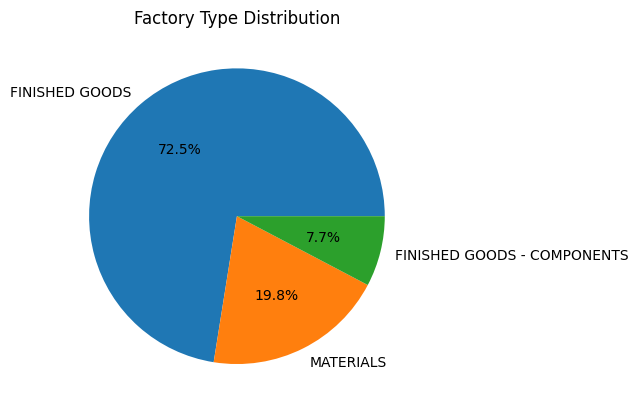

In [10]:
# how many type of factory we have
res= data['Factory Type'].nunique()
print('We have ', res ,"type of factory ")
# how many factory we have in each factory type
res1= data['Factory Type'].value_counts()
print("In each type we have :")
res1
plt.pie(res1, labels=res1.index, autopct='%1.1f%%')
plt.title('Factory Type Distribution')
plt.show()

We have  3 type of product 
In each type we have :


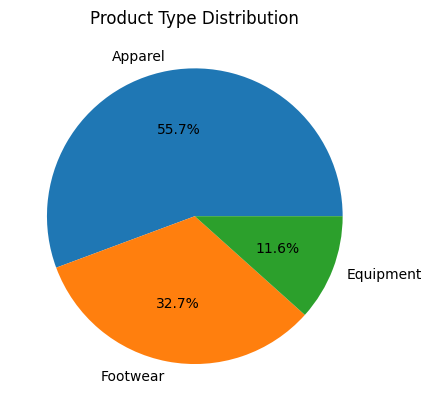

In [11]:
#how manay type of product we have
res2= data['Product Type'].nunique()
print('We have ', res2 ,"type of product ")
#how many factory we have in each product type
res3 = data["Product Type"].value_counts()
print("In each type we have :")
res3
plt.pie(res3, labels=res3.index, autopct='%1.1f%%')
plt.title('Product Type Distribution')
plt.show()

We have  2 brand 
In each brand we have :


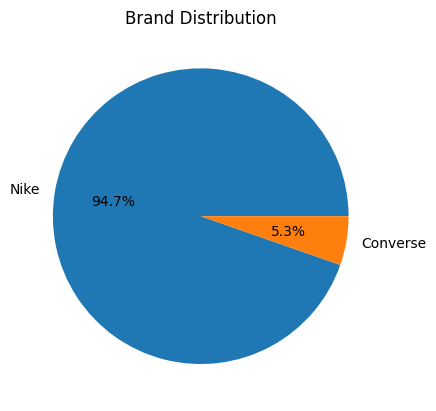

In [12]:
#how many brand we have
res4= data['Brand'].nunique()
print('We have ', res4 ,"brand ")
#how many factory we have in each brand
res5 = data["Brand"].value_counts()
print("In each brand we have :")
res5
plt.pie(res5, labels=res5.index, autopct='%1.1f%%')
plt.title('Brand Distribution')
plt.show()

['Taiwan' 'USA' 'Indonesia' 'Cambodia' 'China' 'Vietnam' 'Thailand'
 'Italy' 'South Korea' 'Pakistan' 'Bosnia' 'Brazil' 'Jordan' 'Egypt'
 'India' 'Japan' 'Sri Lanka' 'Argentina' 'Mexico' 'Guatemala'
 'Philippines' 'Georgia' 'Honduras' 'El Salvador' 'Turkey' 'Moldova'
 'Malaysia' 'South Africa' 'Spain' 'Nicaragua' 'France' 'Canada'
 'United Kingdom' 'Netherlands' 'Lithuania' 'Israel']
In each country we have :


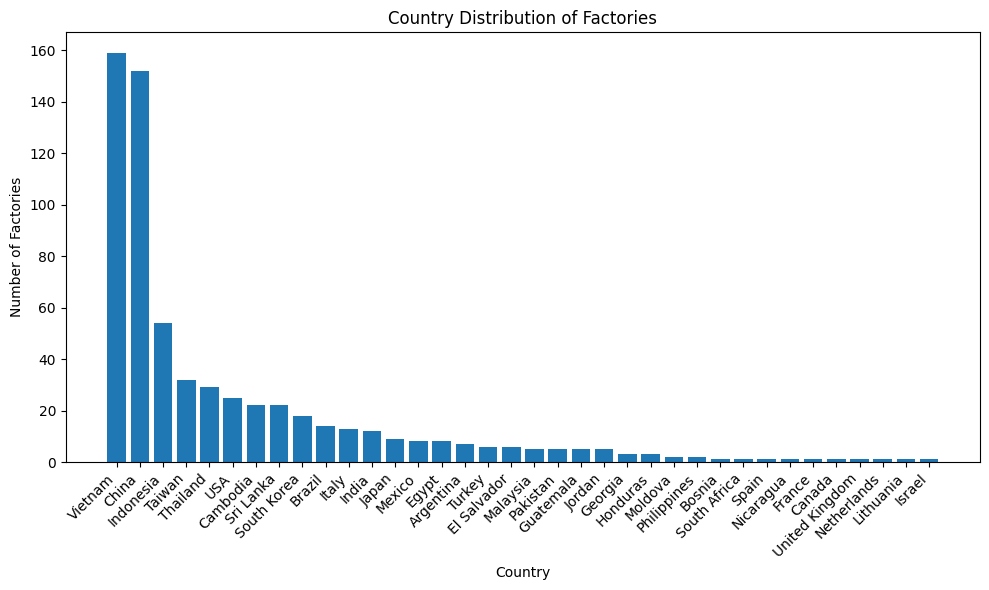

In [17]:
# how many country we have
print(data["Country"].unique())
# how many factory in each country
res6 = data["Country"].value_counts()
print("In each country we have :")
res6
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(res6.index, res6.values)  # Create a bar plot
# Customize the chart
plt.xlabel("Country")
plt.ylabel("Number of Factories")
plt.title("Country Distribution of Factories")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

plt.show()


 in matter of region , we have   ['N ASIA' 'AMERICAS' 'S ASIA' 'SE ASIA' 'EMEA']
In each region we have :


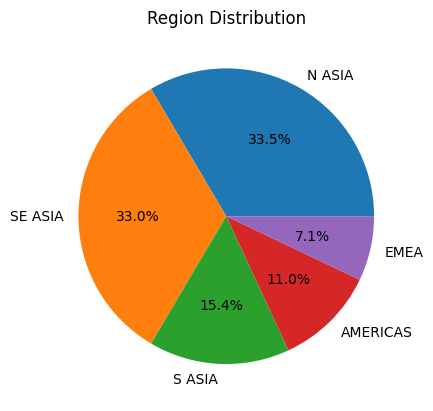

In [18]:
#how many region we have
res7 = data['Region'].unique()
print(" in matter of region , we have  ", res7)
# how many factory in each region
res8 = data["Region"].value_counts()
print("In each region we have :")
res8
plt.pie(res8, labels=res8.index, autopct='%1.1f%%')
plt.title('Region Distribution')
plt.show()

In [ ]:
data.head()

,Factory Name,Factory Type,Product Type,Brand,Events,Supplier Group,City,State,Country,Region,Total Workers,Line Workers,Female Workers,Migrant Workers,Male Workers
0,EVEREST TEXTILE CO LTD,MATERIALS,Apparel,Nike,Collegiate,EVEREST TEXTILE,Tainan City,Tainan,Taiwan,N ASIA,1439,811,733,820,706
1,Big Game Sports,FINISHED GOODS,Equipment,Nike,Collegiate,BIG GAME SPORTS,Dallas,Texas,USA,AMERICAS,68,51,24,0,44
2,PT Semarang Garment,FINISHED GOODS,Apparel,Nike,Collegiate,KUKDONG,Semarang,Jawa Tengah,Indonesia,S ASIA,3851,3462,3619,0,232
3,Charmgo (Cambodia) Co. Ltd,FINISHED GOODS,Apparel,Nike,Collegiate,CHARMGO,Kampong Spey,Kampong Spueu,Cambodia,SE ASIA,1557,1526,1105,15,452
4,SAN FANG (TR1) (CHINA),MATERIALS,Footwear,Nike,Collegiate,SAN FANG,"DONGGUAN, GUANGDONG",Guangdong,China,N ASIA,307,225,61,0,246


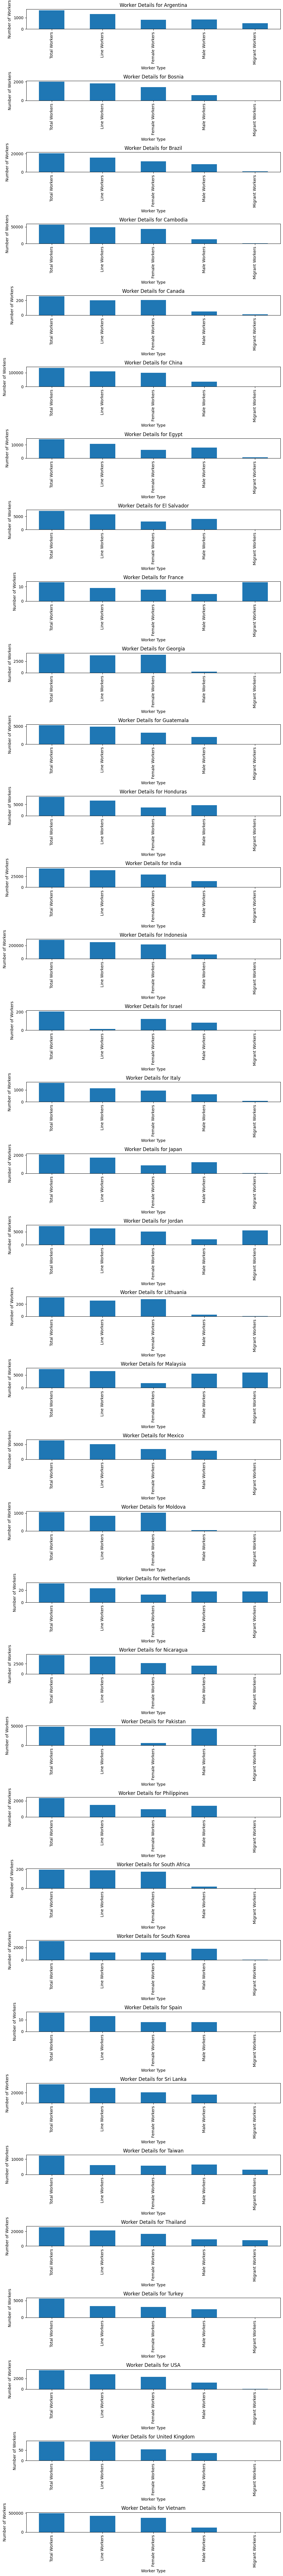

In [36]:
# how many total workers in details (each country)
res9 = data.groupby("Country").agg({"Total Workers": "sum", "Line Workers": "sum", "Female Workers":"sum",  "Male Workers":"sum","Migrant Workers":"sum"  })
res9
# Get the unique countries
countries = res9.index

# Create subplots within a single figure
fig, axes = plt.subplots(nrows=len(countries), ncols=1, figsize=(10, 90)) # Adjust figsize as needed

# Iterate through each country and plot the data
for i, country in enumerate(countries):
    ax = axes[i]  # Get the current subplot axes
    data_to_plot = res9.loc[country, ["Total Workers", "Line Workers", "Female Workers", "Male Workers", "Migrant Workers"]]
    data_to_plot.plot(kind='bar', ax=ax)  # Plot as a bar chart
    ax.set_title(f"Worker Details for {country} SUM")  # Set subplot title
    ax.set_xlabel("Worker Type")  # Set x-axis label
    ax.set_ylabel("Number of Workers")  # Set y-axis label

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the figure



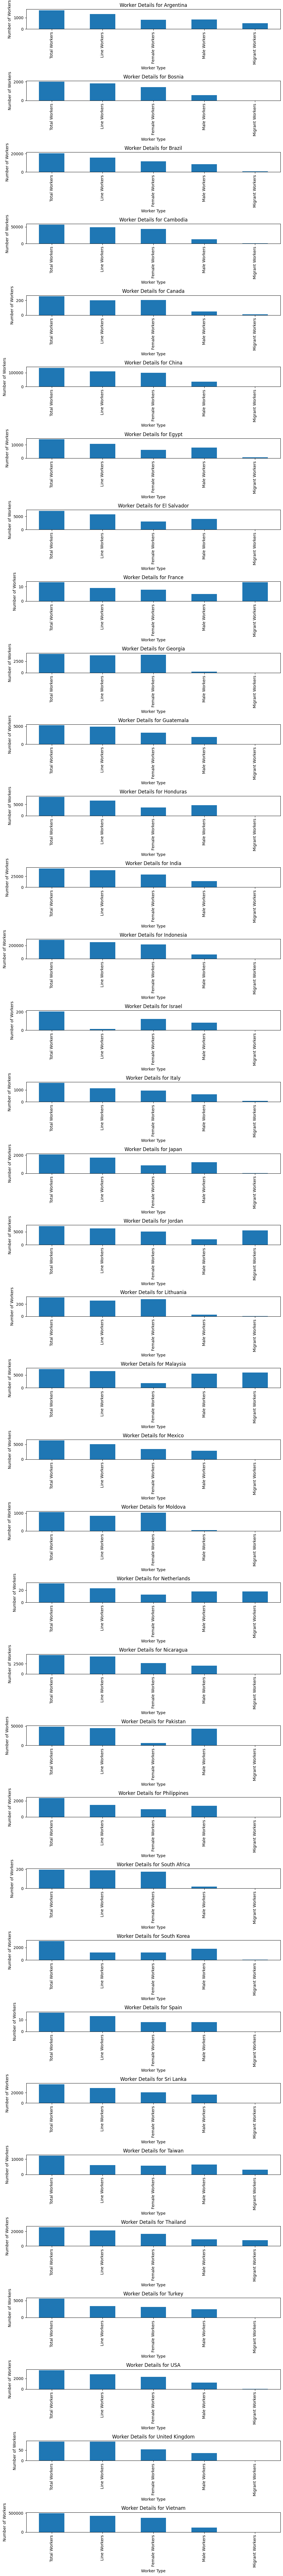

In [28]:
# the maximum  workers in details (each country)
res10 = data.groupby("Country").agg({"Total Workers": "max", "Line Workers": "max", "Female Workers":"max",  "Male Workers":"max","Migrant Workers":"max",  })
res10
# Get the unique countries
countries = res10.index

# Create subplots within a single figure
fig, axes = plt.subplots(nrows=len(countries), ncols=1, figsize=(10, 90)) # Adjust figsize as needed

# Iterate through each country and plot the data
for i, country in enumerate(countries):
    ax = axes[i]  # Get the current subplot axes
    data_to_plot = res10.loc[country, ["Total Workers", "Line Workers", "Female Workers", "Male Workers", "Migrant Workers"]]
    data_to_plot.plot(kind='bar', ax=ax)  # Plot as a bar chart
    ax.set_title(f"Worker Details for {country} MAX")  # Set subplot title
    ax.set_xlabel("Worker Type")  # Set x-axis label
    ax.set_ylabel("Number of Workers")  # Set y-axis label

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the figure



In [ ]:
# the minimum workers in details (each country)
res11 = data.groupby("Country").agg({"Total Workers": "min", "Line Workers": "min", "Female Workers":"min",  "Male Workers":"min","Migrant Workers":"min" })
res11
# Get the unique countries
countries = res11.index

# Create subplots within a single figure
fig, axes = plt.subplots(nrows=len(countries), ncols=1, figsize=(8, 20)) # Adjust figsize as needed

# Iterate through each country and plot the data
for i, country in enumerate(countries):
    ax = axes[i]  # Get the current subplot axes
    data_to_plot = res11.loc[country, ["Total Workers", "Line Workers", "Female Workers", "Male Workers", "Migrant Workers"]]
    data_to_plot.plot(kind='bar', ax=ax)  # Plot as a bar chart
    ax.set_title(f"Worker Details for {country} MIN")  # Set subplot title
    ax.set_xlabel("Worker Type")  # Set x-axis label
    ax.set_ylabel("Number of Workers")  # Set y-axis label

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the figure


,Total Workers,Line Workers,Female Workers,Male Workers,Migrant Workers
Country,,,,,
Argentina,21,17,16,5,0
Bosnia,1998,1835,1418,580,0
Brazil,44,22,17,17,0
Cambodia,30,23,0,2,0
Canada,255,200,204,51,12
China,2,1,0,0,0
Egypt,265,206,156,109,0
El Salvador,373,311,0,150,0
France,13,9,8,5,13


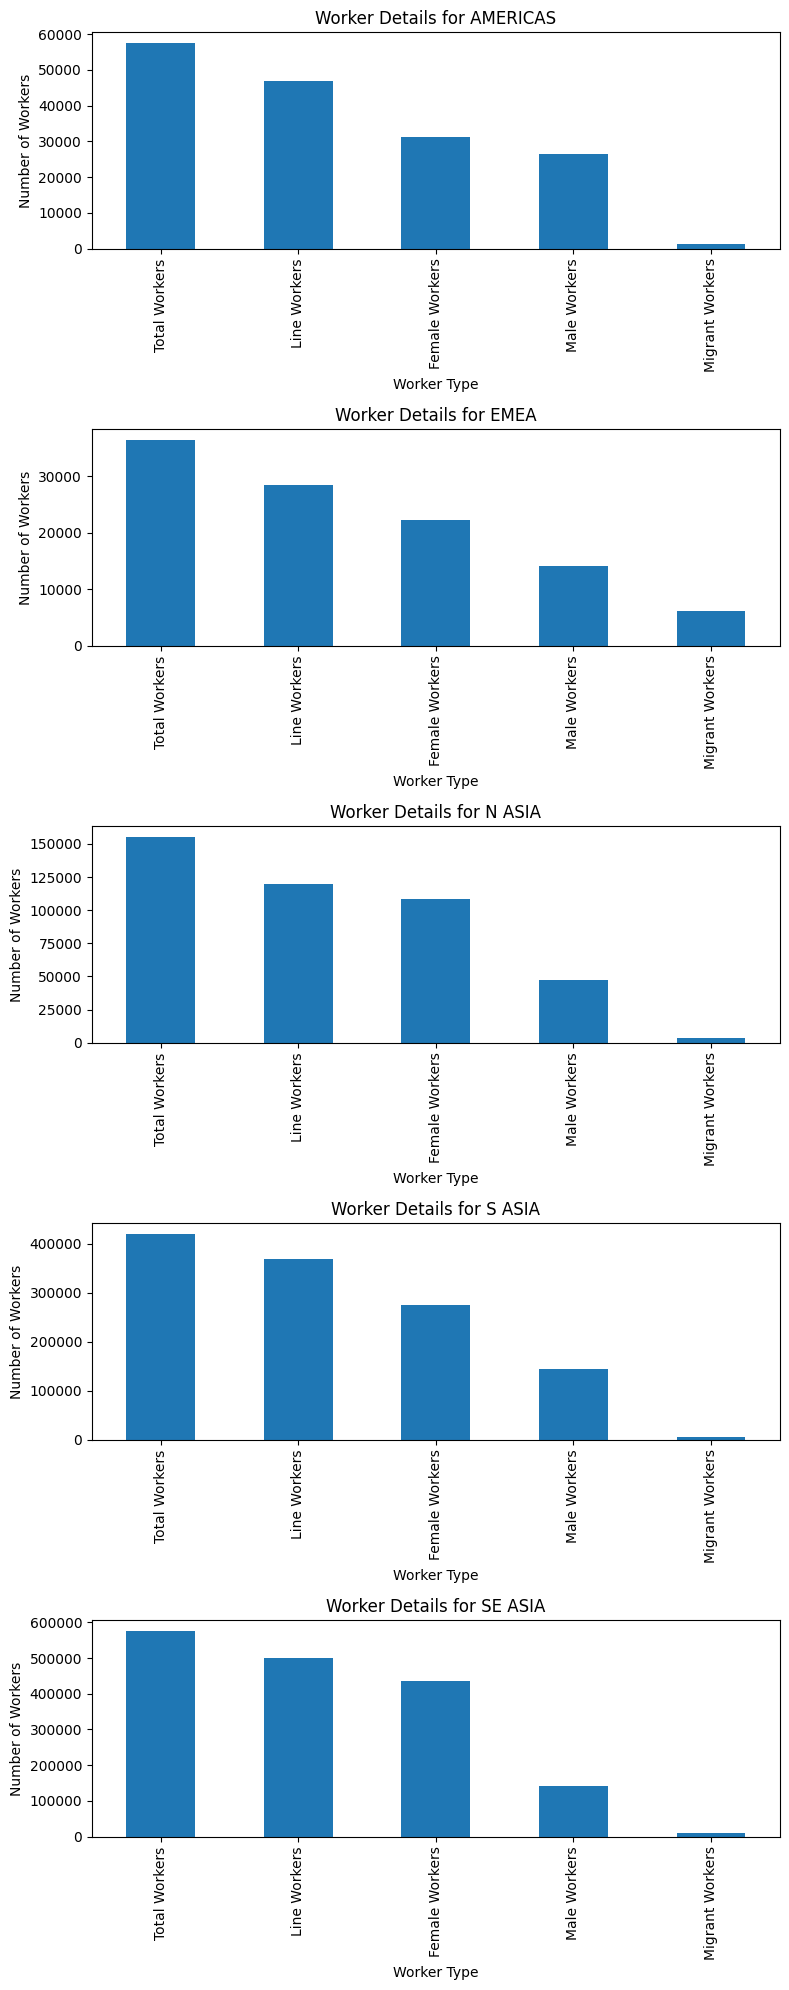

In [34]:
# # how many total workers in details (each region)
res12 = data.groupby("Region").agg({"Total Workers": "sum", "Line Workers": "sum", "Female Workers":"sum",  "Male Workers":"sum","Migrant Workers":"sum" })
res12
# Get the unique countries
countries = res12.index

# Create subplots within a single figure
fig, axes = plt.subplots(nrows=len(countries), ncols=1, figsize=(8, 20)) # Adjust figsize as needed

# Iterate through each country and plot the data
for i, country in enumerate(countries):
    ax = axes[i]  # Get the current subplot axes
    data_to_plot = res12.loc[country, ["Total Workers", "Line Workers", "Female Workers", "Male Workers", "Migrant Workers"]]
    data_to_plot.plot(kind='bar', ax=ax)  # Plot as a bar chart
    ax.set_title(f"Worker Details for {country} SUM")  # Set subplot title
    ax.set_xlabel("Worker Type")  # Set x-axis label
    ax.set_ylabel("Number of Workers")  # Set y-axis label

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the figure


In [ ]:
# the maximum workers in details (each region)
res13 = data.groupby("Region").agg({"Total Workers": "max", "Line Workers": "max", "Female Workers":"max",  "Male Workers":"max","Migrant Workers":"max", })
res13
# Get the unique countries
countries = res13.index

# Create subplots within a single figure
fig, axes = plt.subplots(nrows=len(countries), ncols=1, figsize=(8, 20)) # Adjust figsize as needed

# Iterate through each country and plot the data
for i, country in enumerate(countries):
    ax = axes[i]  # Get the current subplot axes
    data_to_plot = res13.loc[country, ["Total Workers", "Line Workers", "Female Workers", "Male Workers", "Migrant Workers"]]
    data_to_plot.plot(kind='bar', ax=ax)  # Plot as a bar chart
    ax.set_title(f"Worker Details for {country} MAX")  # Set subplot title
    ax.set_xlabel("Worker Type")  # Set x-axis label
    ax.set_ylabel("Number of Workers")  # Set y-axis label

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the figure


,Total Workers,Line Workers,Female Workers,Male Workers,Migrant Workers
Region,,,,,
AMERICAS,5554,5084,2943,2611,633
EMEA,3925,3030,2268,2787,1717
N ASIA,11136,9039,9911,3370,820
S ASIA,27904,24373,24276,16426,2611
SE ASIA,29272,25978,22539,7643,898


In [ ]:
# the minimum  workers in details (each region)
res14 = data.groupby("Region").agg({"Total Workers": "min", "Line Workers": "min", "Female Workers":"min","Migrant Workers":"min" })
res14
# Get the unique countries
countries = res12.index

# Create subplots within a single figure
fig, axes = plt.subplots(nrows=len(countries), ncols=1, figsize=(8, 20)) # Adjust figsize as needed

# Iterate through each country and plot the data
for i, country in enumerate(countries):
    ax = axes[i]  # Get the current subplot axes
    data_to_plot = res12.loc[country, ["Total Workers", "Line Workers", "Female Workers", "Male Workers", "Migrant Workers"]]
    data_to_plot.plot(kind='bar', ax=ax)  # Plot as a bar chart
    ax.set_title(f"Worker Details for {country} MIN")  # Set subplot title
    ax.set_xlabel("Worker Type")  # Set x-axis label
    ax.set_ylabel("Number of Workers")  # Set y-axis label

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the figure

,Total Workers,Line Workers,Female Workers,Migrant Workers
Region,,,,
AMERICAS,21,10,0,0
EMEA,11,8,5,0
N ASIA,2,1,0,0
S ASIA,28,20,0,0
SE ASIA,2,1,0,0


In [ ]:
data.describe()

,Female Workers,Migrant Workers
count,636.000000,636.000000
mean,1371.306604,42.210692
std,2862.546919,192.250041
min,0.000000,0.000000
25%,65.000000,0.000000
50%,364.000000,0.000000
75%,1270.500000,0.250000
max,24276.000000,2611.000000


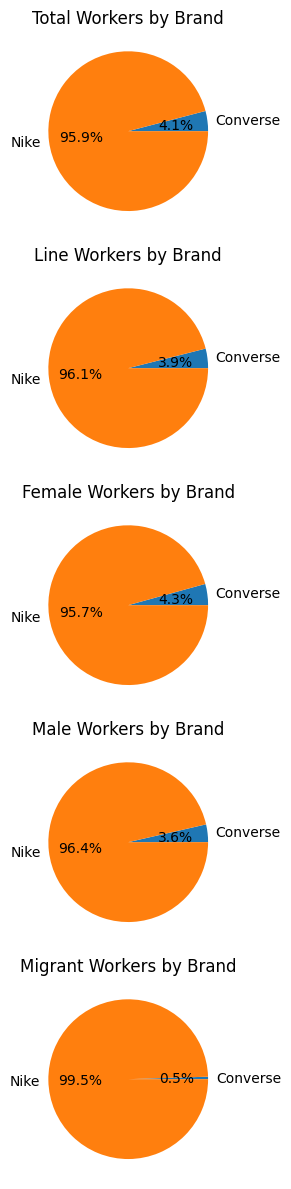

In [41]:
# selon le brand on va calculer le sum de chaque colonne
res15 = data.groupby('Brand').agg({'Total Workers': 'sum', 'Line Workers': 'sum', 'Female Workers':'sum',  'Male Workers':'sum','Migrant Workers':'sum'  })
res15
columns_to_plot = ['Total Workers', 'Line Workers', 'Female Workers', 'Male Workers', 'Migrant Workers']

# Create subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 12))  # Adjust figsize as needed

# Iterate through columns and create bar plots
for i, column in enumerate(columns_to_plot):
    ax = axes[i]  # Get the current subplot axes
    ax.pie(res15[column], labels=res15.index, autopct='%1.1f%%')  # Plot as a pie chart
    ax.set_title(f"{column} by Brand")
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
data.head()

,Factory Name,Factory Type,Product Type,Brand,Events,Supplier Group,City,State,Country,Region,Total Workers,Line Workers,Female Workers,Migrant Workers,Male Workers
0,EVEREST TEXTILE CO LTD,MATERIALS,Apparel,Nike,Collegiate,EVEREST TEXTILE,Tainan City,Tainan,Taiwan,N ASIA,1439,811,733,820,706
1,Big Game Sports,FINISHED GOODS,Equipment,Nike,Collegiate,BIG GAME SPORTS,Dallas,Texas,USA,AMERICAS,68,51,24,0,44
2,PT Semarang Garment,FINISHED GOODS,Apparel,Nike,Collegiate,KUKDONG,Semarang,Jawa Tengah,Indonesia,S ASIA,3851,3462,3619,0,232
3,Charmgo (Cambodia) Co. Ltd,FINISHED GOODS,Apparel,Nike,Collegiate,CHARMGO,Kampong Spey,Kampong Spueu,Cambodia,SE ASIA,1557,1526,1105,15,452
4,SAN FANG (TR1) (CHINA),MATERIALS,Footwear,Nike,Collegiate,SAN FANG,"DONGGUAN, GUANGDONG",Guangdong,China,N ASIA,307,225,61,0,246


In [ ]:
# Calculate the Line Worker Ratio and create a temporary Series with factory names as the index
line_worker_ratio = (data['Line Workers'] / data['Total Workers']) * 100

# Associate the ratio with factory names
factory_line_worker_ratio = pd.DataFrame({
    'Factory Name': data['Factory Name'],
    'Line Worker Ratio': line_worker_ratio
})

# Print the resulting DataFrame
factory_line_worker_ratio


,Factory Name,Line Worker Ratio
0,EVEREST TEXTILE CO LTD,56.358582
1,Big Game Sports,75.0
2,PT Semarang Garment,89.898728
3,Charmgo (Cambodia) Co. Ltd,98.008992
4,SAN FANG (TR1) (CHINA),73.289902
...,...,...
631,PT Victory Chingluh Indonesia,86.571998
632,"Olive Apparel (Cambodia) Co., Ltd.",86.89168
633,PT. Kanindo Makmur Jaya,98.532934
634,South Island Garment Sdn Bhd,55.394525


In [ ]:
# Generate realistic random hours
np.random.seed(42)  # For reproducibility
data['Females Hours'] = data['Female Workers'] * np.random.uniform(6, 10, size=len(data))
data['Males Hours'] = data['Male Workers'] * np.random.uniform(6, 10, size=len(data))
data['Migrant Hours'] = data['Migrant Workers'] * np.random.uniform(6, 10, size=len(data))

# Calculate total hours worked as the sum of all individual group hours
data['Total Hours Worked'] = data['Females Hours'] + data['Males Hours'] + data['Migrant Hours']

# Optional: Round the hours to make them more realistic as integer values
data['Females Hours'] = data['Females Hours'].astype(int)
data['Males Hours'] = data['Males Hours'].astype(int)
data['Migrant Hours'] = data['Migrant Hours'].astype(int)
data['Total Hours Worked'] = data['Total Hours Worked'].astype(int)
data.head()

,Factory Name,Factory Type,Product Type,Brand,Events,Supplier Group,City,State,Country,Region,Total Workers,Line Workers,Female Workers,Migrant Workers,Male Workers,Females Hours,Males Hours,Migrant Hours,Total Hours Worked
0,EVEREST TEXTILE CO LTD,MATERIALS,Apparel,Nike,Collegiate,EVEREST TEXTILE,Tainan City,Tainan,Taiwan,N ASIA,1439,811,733,820,706,5496,5740,7477,18714
1,Big Game Sports,FINISHED GOODS,Equipment,Nike,Collegiate,BIG GAME SPORTS,Dallas,Texas,USA,AMERICAS,68,51,24,0,44,235,306,0,541
2,PT Semarang Garment,FINISHED GOODS,Apparel,Nike,Collegiate,KUKDONG,Semarang,Jawa Tengah,Indonesia,S ASIA,3851,3462,3619,0,232,32310,1641,0,33952
3,Charmgo (Cambodia) Co. Ltd,FINISHED GOODS,Apparel,Nike,Collegiate,CHARMGO,Kampong Spey,Kampong Spueu,Cambodia,SE ASIA,1557,1526,1105,15,452,9276,3394,96,12766
4,SAN FANG (TR1) (CHINA),MATERIALS,Footwear,Nike,Collegiate,SAN FANG,"DONGGUAN, GUANGDONG",Guangdong,China,N ASIA,307,225,61,0,246,404,1495,0,1899


In [ ]:
data.head()

,Factory Name,Factory Type,Product Type,Brand,Events,Supplier Group,City,State,Country,Region,Total Workers,Line Workers,Female Workers,Migrant Workers,Male Workers,Females Hours,Males Hours,Migrant Hours,Total Hours Worked
0,EVEREST TEXTILE CO LTD,MATERIALS,Apparel,Nike,Collegiate,EVEREST TEXTILE,Tainan City,Tainan,Taiwan,N ASIA,1439,811,733,820,706,5496,5740,7477,18714
1,Big Game Sports,FINISHED GOODS,Equipment,Nike,Collegiate,BIG GAME SPORTS,Dallas,Texas,USA,AMERICAS,68,51,24,0,44,235,306,0,541
2,PT Semarang Garment,FINISHED GOODS,Apparel,Nike,Collegiate,KUKDONG,Semarang,Jawa Tengah,Indonesia,S ASIA,3851,3462,3619,0,232,32310,1641,0,33952
3,Charmgo (Cambodia) Co. Ltd,FINISHED GOODS,Apparel,Nike,Collegiate,CHARMGO,Kampong Spey,Kampong Spueu,Cambodia,SE ASIA,1557,1526,1105,15,452,9276,3394,96,12766
4,SAN FANG (TR1) (CHINA),MATERIALS,Footwear,Nike,Collegiate,SAN FANG,"DONGGUAN, GUANGDONG",Guangdong,China,N ASIA,307,225,61,0,246,404,1495,0,1899


In [ ]:
# Group by Region and sum all hours and workers
region= data.groupby('Region').agg({
    'Total Hours Worked': 'sum',
    'Females Hours': 'sum',
    'Males Hours': 'sum',
    'Migrant Hours': 'sum',
    'Total Workers': 'sum',
    'Female Workers': 'sum',
    'Male Workers': 'sum',
    'Migrant Workers': 'sum'}).reset_index()
region


,Region,Total Hours Worked,Females Hours,Males Hours,Migrant Hours,Total Workers,Female Workers,Male Workers,Migrant Workers
0,AMERICAS,460370,249116,203154,8066,57598,31229,26369,1263
1,EMEA,342363,179289,106619,56425,36521,22355,14166,6169
2,N ASIA,1301251,884647,388034,28457,155517,108322,47195,3546
3,S ASIA,3453229,2246242,1156745,50180,420324,275500,144824,6248
4,SE ASIA,4689760,3484634,1127232,77755,576607,434745,141862,9620


In [ ]:
# Group by Factory Type and calculate average hours per worker type
factory_type_hours = data.groupby('Factory Type').agg({
    'Females Hours': 'mean',
    'Males Hours': 'mean',
    'Migrant Hours': 'mean',
    'Total Hours Worked': 'mean'}).astype(int).reset_index()
factory_type_hours


,Factory Type,Females Hours,Males Hours,Migrant Hours,Total Hours Worked
0,FINISHED GOODS,14179,5055,350,19585
1,FINISHED GOODS - COMPONENTS,4651,2057,113,6823
2,MATERIALS,2216,4366,427,7011


In [ ]:
# Group by country Type and calculate average hours per worker type
factory_type_hours = data.groupby('Country').agg({
    'Females Hours': 'mean',
    'Males Hours': 'mean',
    'Migrant Hours': 'mean',
    'Total Hours Worked': 'mean'}).astype(int).reset_index()
factory_type_hours

,Country,Females Hours,Males Hours,Migrant Hours,Total Hours Worked
0,Argentina,928,1067,472,2468
1,Bosnia,9640,4885,0,14525
2,Brazil,6414,4490,307,11212
3,Cambodia,15773,4823,276,20874
4,Canada,1634,446,98,2179
5,China,5359,1935,16,7312
6,Egypt,6481,6861,502,13846
7,El Salvador,3927,5452,13,9393
8,France,49,31,115,196
9,Georgia,11089,680,0,11770


In [ ]:
# Group by region and calculate average hours per worker type
factory_type_hours = data.groupby('Region').agg({
    'Females Hours': 'mean',
    'Males Hours': 'mean',
    'Migrant Hours': 'mean',
    'Total Hours Worked': 'mean'}).astype(int).reset_index()
factory_type_hours

,Region,Females Hours,Males Hours,Migrant Hours,Total Hours Worked
0,AMERICAS,3558,2902,115,6576
1,EMEA,3984,2369,1253,7608
2,N ASIA,4153,1821,133,6109
3,S ASIA,22920,11803,512,35237
4,SE ASIA,16593,5367,370,22332


In [ ]:
# Group by Factory Name to find max and min working hours
stats = data.groupby('Factory Name').agg({
    'Total Hours Worked': ['max', 'min', 'mean', 'sum']
}).reset_index()

stats

Factory Name Total Hours Worked  \
                                                                      max   
0     Song Hong Garment JSC_Song Hong7 ( Factory 11...              15724   
1                                  A & K Designs, Inc.               1130   
2                            ACE Accessories Co., Ltd.                533   
3                               ADORA FOOTWEAR LIMITED              67179   
4                        AHP APPAREL PVT LTD., UNIT 60              19826   
..                                                 ...                ...   
627  Zhijie Footwear Technical Service (Zhongshan) ...               4007   
628                          Zhuji Hengan Socks Co Ltd                994   
629         Zhuji Hengtai Knitting & Textile Co., Ltd.               1807   
630                                       framas Korea                281   
631                         framas Korea Vina Co., Ltd               6420   

                            
       min     mean    sum  
0    15724  15724.0  15724  
1     1130   1130.0   1130  
2      533    533.0    533  
3    67179  67179.0  67179  
4    19826  19826.0  19826  
..     ...      ...    ...  
627   4007   4007.0   4007  
628    994    994.0    994  
629   1807   1807.0   1807  
630    281    281.0    281  
631   6420   6420.0   6420  

[632 rows x 5 columns]

In [ ]:
# Group by Country Name to find max and min working hours
stats2 = data.groupby('Country').agg({
    'Total Hours Worked': ['max', 'min', 'mean', 'sum']
}).reset_index()

stats2

Country Total Hours Worked                              
                                  max    min          mean      sum
0        Argentina              10080    150   2468.000000    17276
1           Bosnia              14525  14525  14525.000000    14525
2           Brazil              33877    421  11212.714286   156978
3         Cambodia             143109    284  20874.454545   459238
4           Canada               2179   2179   2179.000000     2179
5            China              85744     29   7312.190789  1111453
6            Egypt              28459   1948  13846.625000   110773
7      El Salvador              19581   2614   9393.166667    56359
8           France                196    196    196.000000      196
9          Georgia              14594   9784  11770.000000    35310
10       Guatemala              30549   1077   9027.800000    45139
11        Honduras              44298   6845  23143.000000    69429
12           India              59432    257  30279.166667   363350
13       Indonesia             230252    360  42488.407407  2294374
14          Israel               1964   1964   1964.000000     1964
15           Italy               3490    102    994.230769    12925
16           Japan              15658     28   2049.444444    18445
17          Jordan              32269   6697  22296.200000   111481
18       Lithuania               2120   2120   2120.000000     2120
19        Malaysia              48842   9683  21884.200000   109421
20          Mexico              13649   1996   5924.500000    47396
21         Moldova               6325   3584   4954.500000     9909
22     Netherlands                420    420    420.000000      420
23       Nicaragua              37849  37849  37849.000000    37849
24        Pakistan             187871  28822  79476.000000   397380
25     Philippines              19466   1402  10434.000000    20868
26    South Africa               1673   1673   1673.000000     1673
27     South Korea               9156    109   1399.500000    25191
28           Spain                105    105    105.000000      105
29       Sri Lanka              36849   1158  13122.909091   288704
30          Taiwan              21212     17   3915.437500   125294
31        Thailand              29566     25   9504.689655   275636
32          Turkey              25271    588   6708.166667    40249
33             USA               3638    167   1110.600000    27765
34  United Kingdom                713    713    713.000000      713
35         Vietnam             255280     34  24873.496855  3954886

In [ ]:
# Group by Region to find max and min working hours
stats3 = data.groupby('Region').agg({
    'Total Hours Worked': ['max', 'min', 'mean', 'sum']
}).reset_index()

stats3

Region Total Hours Worked                            
                           max  min          mean      sum
0  AMERICAS              44298  150   6576.714286   460370
1      EMEA              32269  102   7608.066667   342363
2    N ASIA              85744   17   6109.159624  1301251
3    S ASIA             230252  257  35237.030612  3453229
4   SE ASIA             255280   25  22332.190476  4689760

In [ ]:
# Group by Factory Type to find max and min working hours
stats3 = data.groupby('Factory Type').agg({
    'Total Hours Worked': ['max', 'min', 'mean', 'sum']
}).reset_index()

stats3

Factory Type Total Hours Worked                            
                                              max  min          mean      sum
0               FINISHED GOODS             255280   28  19585.980477  9029137
1  FINISHED GOODS - COMPONENTS              49681  148   6823.285714   334341
2                    MATERIALS              88853   17   7011.865079   883495

In [ ]:
# Group by Factory Type to find max, min, mean, and sum working hours for all worker groups
stats4 = data.groupby('Factory Type').agg({
    'Total Hours Worked': ['max', 'min', 'mean', 'sum'],
    'Females Hours': ['max', 'min', 'mean', 'sum'],
    'Males Hours': ['max', 'min', 'mean', 'sum'],
    'Migrant Hours': ['max', 'min', 'mean', 'sum']}).astype(int).reset_index()
stats4


Factory Type Total Hours Worked                       \
                                              max  min   mean      sum   
0               FINISHED GOODS             255280   28  19585  9029137   
1  FINISHED GOODS - COMPONENTS              49681  148   6823   334341   
2                    MATERIALS              88853   17   7011   883495   

  Females Hours                     Males Hours                     \
            max min   mean      sum         max min  mean      sum   
0        202622   0  14179  6536686      156208   0  5055  2330770   
1         46698   0   4651   227915       21721   0  2057   100838   
2         32272   0   2216   279327       87968  12  4366   550176   

  Migrant Hours                   
            max min mean     sum  
0         16331   0  350  161417  
1          1416   0  113    5557  
2         19055   0  427   53909

In [ ]:
# Calculate proportions of hours by worker type grouped by country
proportion_by_country = data.groupby('Country').agg({
    'Total Hours Worked': 'sum',
    'Females Hours': 'sum',
    'Males Hours': 'sum',
    'Migrant Hours': 'sum'
}).reset_index()

proportion_by_country['% Female Hours'] = (proportion_by_country['Females Hours'] / proportion_by_country['Total Hours Worked']) * 100
proportion_by_country['% Males Hours'] = (proportion_by_country['Males Hours'] / proportion_by_country['Total Hours Worked']) * 100
proportion_by_country['% Migrant Hours'] = (proportion_by_country['Migrant Hours'] / proportion_by_country['Total Hours Worked']) * 100

proportion_by_country


,Country,Total Hours Worked,Females Hours,Males Hours,Migrant Hours,% Female Hours,% Males Hours,% Migrant Hours
0,Argentina,17276,6496,7469,3308,37.601297,43.233387,19.147951
1,Bosnia,14525,9640,4885,0,66.368330,33.631670,0.000000
2,Brazil,156978,89796,62862,4311,57.202920,40.045102,2.746245
3,Cambodia,459238,347007,106123,6092,75.561474,23.108497,1.326545
4,Canada,2179,1634,446,98,74.988527,20.468105,4.497476
5,China,1111453,814705,294189,2484,73.300895,26.468866,0.223491
6,Egypt,110773,51854,54893,4021,46.811046,49.554494,3.629946
7,El Salvador,56359,23564,32712,80,41.810536,58.042194,0.141947
8,France,196,49,31,115,25.000000,15.816327,58.673469
9,Georgia,35310,33269,2040,0,94.219768,5.777400,0.000000


In [ ]:
# Calculate proportions of hours by worker type grouped by region
proportion_by_region = data.groupby('Region').agg({
    'Total Hours Worked': 'sum',
    'Females Hours': 'sum',
    'Males Hours': 'sum',
    'Migrant Hours': 'sum'
}).reset_index()

proportion_by_region['% Female Hours'] = (proportion_by_region['Females Hours'] / proportion_by_region['Total Hours Worked']) * 100
proportion_by_region['% Males Hours'] = (proportion_by_region['Males Hours'] / proportion_by_region['Total Hours Worked']) * 100
proportion_by_region['% Migrant Hours'] = (proportion_by_region['Migrant Hours'] / proportion_by_region['Total Hours Worked']) * 100

proportion_by_region


,Region,Total Hours Worked,Females Hours,Males Hours,Migrant Hours,% Female Hours,% Males Hours,% Migrant Hours
0,AMERICAS,460370,249116,203154,8066,54.112127,44.128418,1.752069
1,EMEA,342363,179289,106619,56425,52.368101,31.142092,16.481045
2,N ASIA,1301251,884647,388034,28457,67.984347,29.820073,2.186896
3,S ASIA,3453229,2246242,1156745,50180,65.047583,33.497489,1.453133
4,SE ASIA,4689760,3484634,1127232,77755,74.303035,24.036027,1.657974


In [ ]:
# Create a pivot table for deeper insights
pivot_table = data.pivot_table(values=['Total Hours Worked', 'Females Hours', 'Males Hours', 'Migrant Hours'], index='Country', columns='Factory Type', aggfunc='mean', fill_value=0)
pivot_table.round(2)


Females Hours                                        \
Factory Type   FINISHED GOODS FINISHED GOODS - COMPONENTS MATERIALS   
Country                                                               
Argentina              928.00                        0.00      0.00   
Bosnia                9640.00                        0.00      0.00   
Brazil                6839.00                      889.00      0.00   
Cambodia             17321.40                      334.00    245.00   
Canada                1634.00                        0.00      0.00   
China                 6143.60                     6892.12   2693.63   
Egypt                 6481.75                        0.00      0.00   
El Salvador           4338.40                        0.00   1872.00   
France                  49.00                        0.00      0.00   
Georgia              11089.67                        0.00      0.00   
Guatemala             5613.60                        0.00      0.00   
Honduras             15018.50                     2239.00      0.00   
India                27620.67                        0.00      0.00   
Indonesia            42443.78                     5574.00    606.11   
Israel                1179.00                        0.00      0.00   
Italy                  495.33                     1483.00      0.00   
Japan                  124.29                        0.00   3440.00   
Jordan                8173.40                        0.00      0.00   
Lithuania             1837.00                        0.00      0.00   
Malaysia              2643.25                        0.00   4742.00   
Mexico                3133.62                        0.00      0.00   
Moldova               4804.00                        0.00      0.00   
Netherlands             93.00                        0.00      0.00   
Nicaragua            24246.00                        0.00      0.00   
Pakistan             11788.25                        0.00    885.00   
Philippines           4096.00                        0.00      0.00   
South Africa          1548.00                        0.00      0.00   
South Korea           4198.50                      117.00     72.09   
Spain                   48.00                        0.00      0.00   
Sri Lanka             9739.88                        0.00   1753.17   
Taiwan                1698.50                      864.83   1378.19   
Thailand              5036.09                        0.00   3406.83   
Turkey                3897.80                        0.00   1961.00   
USA                    718.68                        0.00      0.00   
United Kingdom         420.00                        0.00      0.00   
Vietnam              24483.52                     6509.69   3262.10   

                  Males Hours                                        \
Factory Type   FINISHED GOODS FINISHED GOODS - COMPONENTS MATERIALS   
Country                                                               
Argentina             1067.00                        0.00      0.00   
Bosnia                4885.00                        0.00      0.00   
Brazil                4807.77                      361.00      0.00   
Cambodia              5070.15                     4452.00    268.00   
Canada                 446.00                        0.00      0.00   
China                 1421.55                     1007.12   3651.66   
Egypt                 6861.62                        0.00      0.00   
El Salvador           5524.80                        0.00   5088.00   
France                  31.00                        0.00      0.00   
Georgia                680.00                        0.00      0.00   
Guatemala             3413.80                        0.00      0.00   
Honduras             16273.00                     4535.00      0.00   
India                11205.33                      257.00   6827.50   
Indonesia            11700.22                     6686.50   1943.00   
Israel                 785.00          

In [ ]:
# Calcul de la moyenne, médiane, variance et écart-type
mean_hours = data['Total Hours Worked'].mean()
median_hours = data['Total Hours Worked'].median()
variance_hours = data['Total Hours Worked'].var()
std_deviation_hours = data['Total Hours Worked'].std()

print(f"Moyenne des heures travaillées: {mean_hours}")
print(f"Médiane des heures travaillées: {median_hours}")
print(f"Variance des heures travaillées: {variance_hours}")
print(f"Écart-type des heures travaillées: {std_deviation_hours}")

Moyenne des heures travaillées: 16111.592767295597
Médiane des heures travaillées: 5930.0
Variance des heures travaillées: 908244824.4307512
Écart-type des heures travaillées: 30137.10046488798


                    Total Hours Worked  Females Hours  Males Hours  \
Total Hours Worked            1.000000       0.952486     0.728026   
Females Hours                 0.952486       1.000000     0.489830   
Males Hours                   0.728026       0.489830     1.000000   
Migrant Hours                 0.044448      -0.026692     0.035881   

                    Migrant Hours  
Total Hours Worked       0.044448  
Females Hours           -0.026692  
Males Hours              0.035881  
Migrant Hours            1.000000  


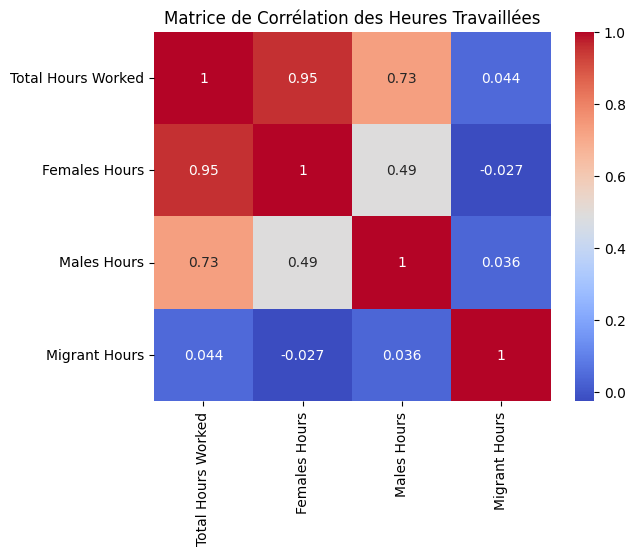

In [ ]:
# Calcul de la matrice de corrélation
correlation_matrix = data[['Total Hours Worked', 'Females Hours', 'Males Hours', 'Migrant Hours']].corr()
print(correlation_matrix)

# Visualisation avec Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation des Heures Travaillées')
plt.show()

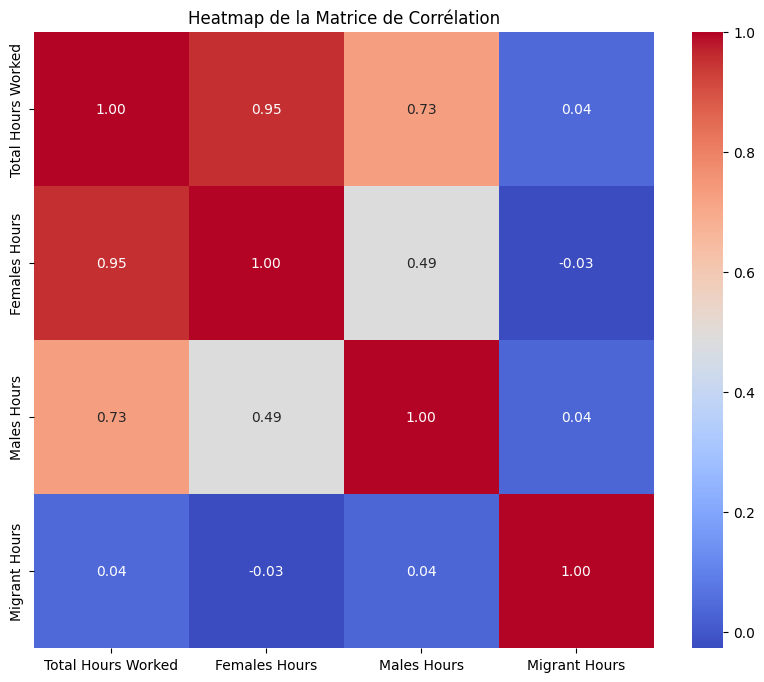

In [ ]:

# Calcul de la matrice de corrélation
correlation_matrix = data[['Total Hours Worked', 'Females Hours', 'Males Hours', 'Migrant Hours']].corr()

# Création d'un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de la Matrice de Corrélation')
plt.show()

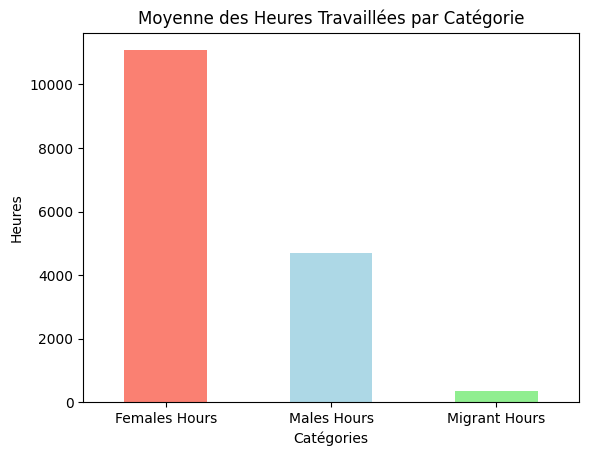

In [ ]:
# Moyennes des heures travaillées pour chaque catégorie
mean_hours = data[['Females Hours', 'Males Hours', 'Migrant Hours']].mean()

mean_hours.plot(kind='bar', color=['salmon', 'lightblue', 'lightgreen'])
plt.title('Moyenne des Heures Travaillées par Catégorie')
plt.ylabel('Heures')
plt.xlabel('Catégories')
plt.xticks(rotation=0)
plt.show()

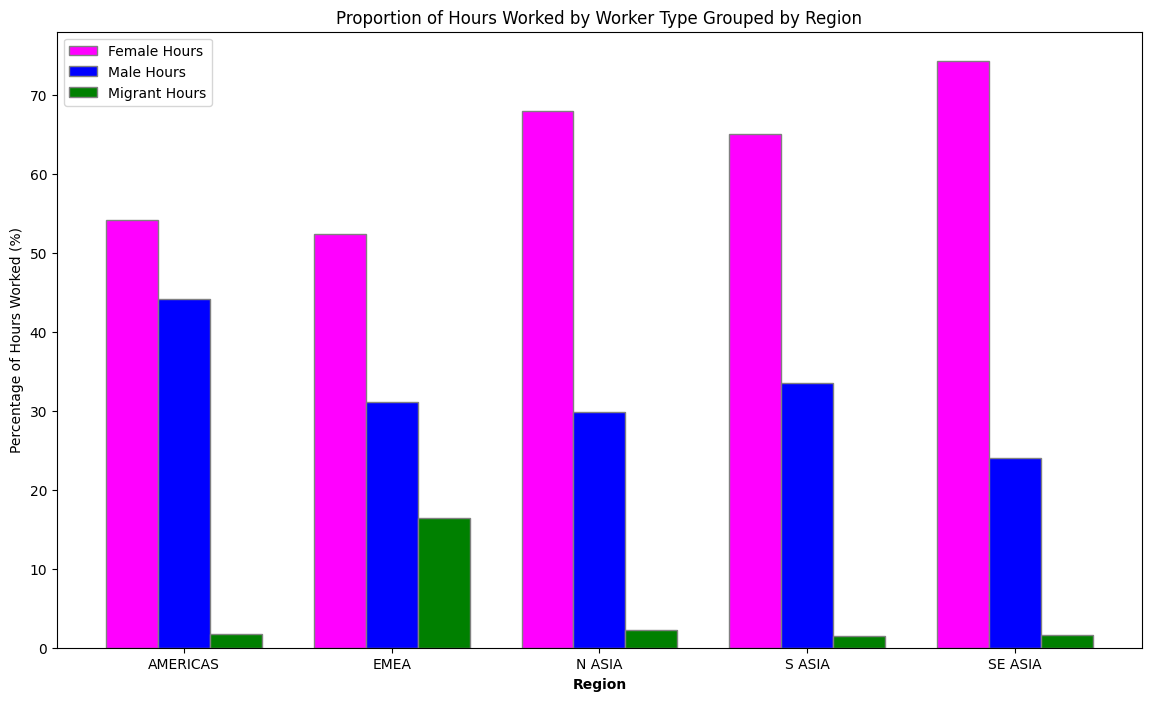

In [ ]:
plt.figure(figsize=(14, 8))
bar_width = 0.25

r1 = range(len(proportion_by_region['Region']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, proportion_by_region['% Female Hours'], color='magenta', width=bar_width, edgecolor='grey', label='Female Hours')
plt.bar(r2, proportion_by_region['% Males Hours'], color='blue', width=bar_width, edgecolor='grey', label='Male Hours')
plt.bar(r3, proportion_by_region['% Migrant Hours'], color='green', width=bar_width, edgecolor='grey', label='Migrant Hours')

plt.xlabel('Region', fontweight='bold')
plt.ylabel('Percentage of Hours Worked (%)')
plt.title('Proportion of Hours Worked by Worker Type Grouped by Region')
plt.xticks([r + bar_width for r in range(len(proportion_by_region['Region']))], proportion_by_region['Region'])

plt.legend()
plt.show()

